In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
pwd

'c:\\Users\\Hi\\Desktop\\Machine Learning foundation course\\Regression Modelling\\House-data-regression'

## Prediction Question: How accurately Can I predict the price of houses given Values of all variable
## Inference: How accurately can I estimate the prices of the houses getting effected by each variable.?

In [3]:
df = pd.read_csv("House_Price.csv", header= 0)

In [4]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [5]:
df.shape

(506, 19)

In [6]:
df.info() ## direct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

Hospital beds have probably Null values

In [7]:
df.describe()   ## Extrapolatory Data Description

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


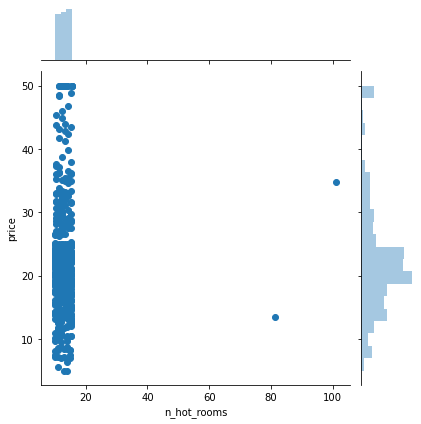

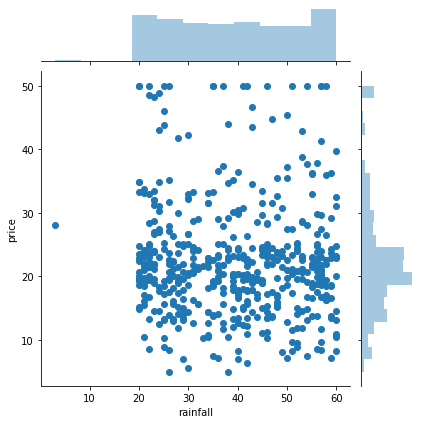

In [8]:
## Hospital Beds have only 498 values read
## 8 Missing Values

## Crime rate is negatively skewed
## outliers in n_hot_rooms and Rainfall

sns.jointplot(x = 'n_hot_rooms', y = 'price', data= df)
sns.jointplot(x = 'rainfall', y = 'price', data= df)

In [9]:
## Rainfall and n_hot_rooms have 1 and 2 outliers respectively
## To be treated

In [10]:
## Categorical Vars
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


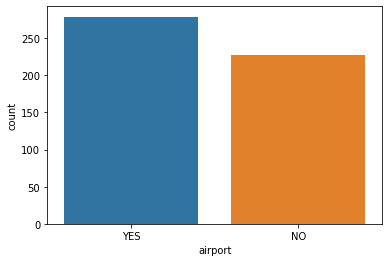

In [11]:
## Cat var = airport, waterbody, bus_ter
sns.countplot('airport', data= df)

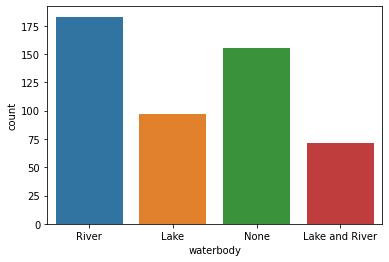

In [12]:
sns.countplot('waterbody', data= df)

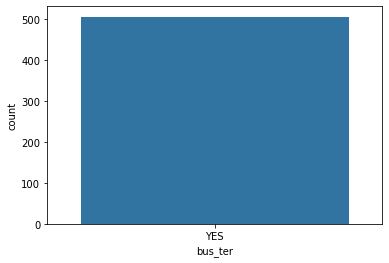

In [13]:
sns.countplot('bus_ter', data= df)

In [14]:
## bus_ter takes only Yes values


Outlier Treatment USing Capping and Flooring

In [15]:
uv = np.percentile(df.n_hot_rooms,[99])[0]       ## Since this will give an array

In [16]:
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [17]:
df.n_hot_rooms[(df.n_hot_rooms > 3* uv)] = 3*uv

In [18]:
lv = np.percentile(df.rainfall,[1])[0]

In [19]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [20]:
df.rainfall[(df.rainfall < 0.3* lv)] = 0.3*lv

In [21]:
0.3*lv

6.0

In [22]:
## Checking for outlier treatment
df.describe()
## Rainfall and n_hot_rooms are now outlier free

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


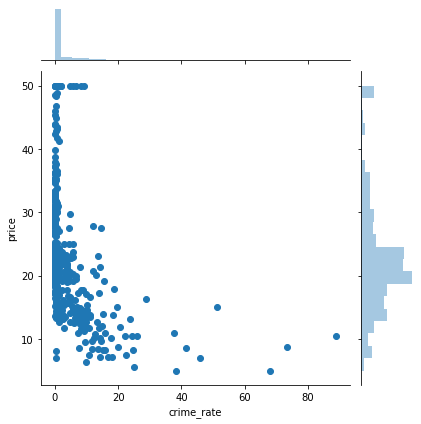

In [23]:
## Crime rate
df.head()
sns.jointplot(x = 'crime_rate', y = 'price', data= df)


In [24]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

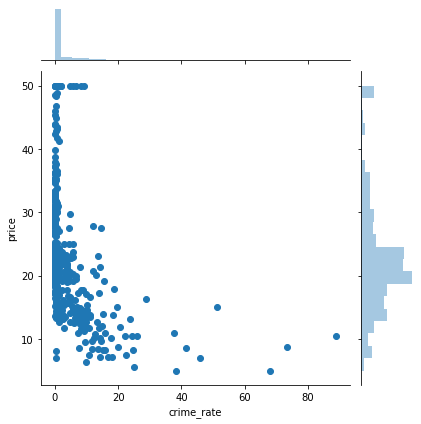

In [26]:
## for skewed data in crime rate
sns.jointplot(x = 'crime_rate', y= 'price', data= df)

In [27]:
## the scatter plot shows a log relation
## we would take log(crime_rate) to get a linear relationshiph betwn Y and x
## crime_rate has a dense scatter cloud at 0 so we take log(1 + crime_rate) since log(0) = -inf

In [28]:
df.crime_rate = np.log(1 + df.crime_rate)

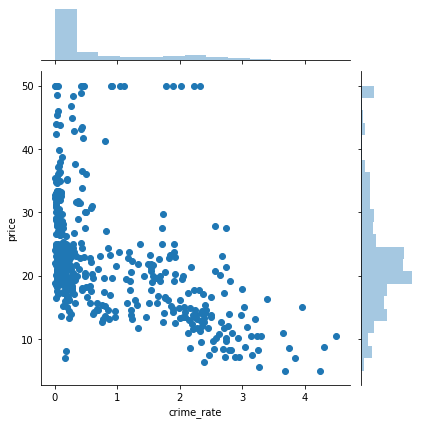

In [29]:
sns.jointplot(x= 'crime_rate', y='price', data=df)

In [30]:
## Graphically more linear than before


In [31]:
## dist (1-4) represent same kind of info and hence we should take an avg of all 4 into 1 var and use it in our model
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4
df = df.drop(['dist1', 'dist2', 'dist3', 'dist4'], axis =1)
## we can take min dist or max dist

In [32]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,12.127500


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   teachers     506 non-null    float64
 7   poor_prop    506 non-null    float64
 8   airport      506 non-null    object 
 9   n_hos_beds   506 non-null    float64
 10  n_hot_rooms  506 non-null    float64
 11  waterbody    506 non-null    object 
 12  rainfall     506 non-null    int64  
 13  bus_ter      506 non-null    object 
 14  parks        506 non-null    float64
 15  avg_dist     506 non-null    float64
dtypes: float64(12), int64(1), object(3)
memory usage: 63.4+ KB


In [34]:
## bus_ter doesnt provide usefull info hence del
del df['bus_ter']

In [35]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,6.0625


In [36]:
## categorical data: airport, waterbody
df = pd.get_dummies(df)

In [37]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,1,0,1,0,0,0


In [38]:
## we dont need airport_no/yes 
## aslo waterbody_none : so Drop

df = df.drop(['airport_NO', 'waterbody_None'], axis= 1)

In [39]:
#df.head()

Now once the data is in some proper form and cleaned. We next run a correlation analysis to check for correlation and Multicollinearity.

In [40]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.466527,-0.484754,-0.429300,0.696304,-0.377999,0.505655,-0.740836,0.108880,0.017007,-0.047200,-0.391574,0.249289,0.182867,0.036233,-0.037497,0.071751
crime_rate,-0.466527,1.000000,0.660283,0.707587,-0.288784,0.559591,-0.390052,0.608970,-0.004089,0.056570,0.082151,0.638951,-0.586371,-0.134486,-0.025390,0.009076,-0.060099
resid_area,-0.484754,0.660283,1.000000,0.763651,-0.391676,0.644779,-0.383248,0.603800,0.005799,-0.003761,0.055845,0.707635,-0.708022,-0.115401,-0.026590,0.051649,-0.098976
air_qual,-0.429300,0.707587,0.763651,1.000000,-0.302188,0.731470,-0.188933,0.590879,-0.049553,0.007238,0.091956,0.915544,-0.769247,-0.073903,-0.046393,0.013849,-0.037772
room_num,0.696304,-0.288784,-0.391676,-0.302188,1.000000,-0.240265,0.355501,-0.613808,0.032009,0.014583,-0.064718,-0.282817,0.205241,0.163774,-0.004195,0.010554,0.046251
age,-0.377999,0.559591,0.644779,0.731470,-0.240265,1.000000,-0.261515,0.602339,-0.021012,0.013918,0.074684,0.673850,-0.747906,0.005101,0.003452,-0.004354,-0.088609
teachers,0.505655,-0.390052,-0.383248,-0.188933,0.355501,-0.261515,1.000000,-0.374044,-0.008056,-0.037007,-0.045928,-0.187004,0.232452,0.069437,0.048717,-0.046981,0.094256
poor_prop,-0.740836,0.608970,0.603800,0.590879,-0.613808,0.602339,-0.374044,1.000000,-0.066008,0.017036,0.061444,0.552310,-0.496967,-0.095054,0.003197,0.020620,-0.109004
n_hos_beds,0.108880,-0.004089,0.005799,-0.049553,0.032009,-0.021012,-0.008056,-0.066008,1.000000,-0.003130,0.058596,-0.071272,-0.027871,-0.006365,0.042278,0.059482,-0.074148
n_hot_rooms,0.017007,0.056570,-0.003761,0.007238,0.014583,0.013918,-0.037007,0.017036,-0.003130,1.000000,0.014869,0.023757,-0.020700,-0.055338,0.037925,0.014755,-0.064096


In [41]:
## First Looking at all var with price
## then considering others.


Park and air_qual have high correlation of 0.9. So this may lead to multicollinearity.
Corr(price , Park) = -0.3915
Corr(price, air_qual) = -0.429
So I will keep air_qual

In [42]:
del df['parks']

In [43]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


## Linear Regression Model

In [44]:
import statsmodels.api as sn

In [45]:
X = sn.add_constant(df['room_num'])

In [46]:
lm = sn.OLS(df['price'], X).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           1.31e-74
Time:                        14:38:20   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
y = df['price']
x = df[['room_num']]

In [50]:
lm1 = LinearRegression()

In [51]:
lm1.fit(x,y)

LinearRegression()

In [52]:
print(lm1.intercept_, lm1.coef_)

-34.659243123097184 [9.09966966]


In [53]:
## help(lm1)

In [54]:
lm2 = lm1.predict(x)

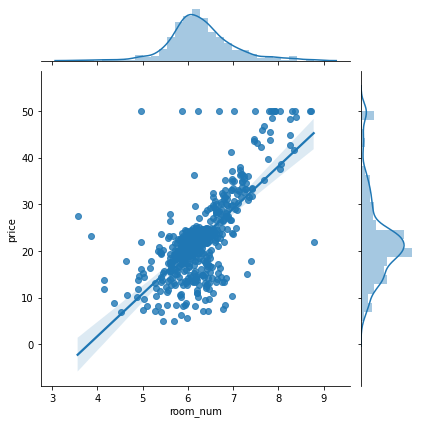

In [55]:
sns.jointplot(x= df['room_num'], y= df['price'], data=df, kind= 'reg')

In [56]:
## Multiple Regression

x_multi = df.drop('price', axis= 1)
Y_multi = df['price']
x_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [57]:
x_multi_const = sn.add_constant(x_multi)
x_multi_const.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,1.0,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,1.0,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,1.0,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,1.0,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0


In [58]:
rm = sn.OLS(Y_multi, x_multi_const).fit()

In [59]:
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     84.34
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          4.19e-125
Time:                        14:38:39   Log-Likelihood:                -1516.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     490   BIC:                             3133.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.4986      5.264     -1.235      0.218     -16.842       3.844
crime_rate                   0.0097      0.348      0.028      0.978      -0.674       0.694
resid_area                  -0.0409      0.058     -0.710      0.478      -0.154       0.072
air_qual                   -15.8974      4.004     -3.971      0.000     -23.764      -8.031
room_num                     4.0190      0.427      9.421      0.000       3.181       4.857
age                         -0.0057      0.014     -0.420      0.675      -0.032       0.021
teachers                     1.0070      0.122      8.247      0.000       0.767       1.247
poor_prop                   -0.5773      0.053    -10.955      0.000      -0.681      -0.474
n_hos_beds                   0.3292      0.152      2.163      0.031       0.030       0.628
n_hot_rooms                  0.0919      0.082      1.118      0.264      -0.070       0.253
rainfall                     0.0161      0.018      0.904      0.367      -0.019       0.051
avg_dist                    -1.2186      0.189     -6.450      0.000      -1.590      -0.847
airport_YES                  1.1315      0.454      2.491      0.013       0.239       2.024
waterbody_Lake               0.2641      0.642      0.411      0.681      -0.997       1.525
waterbody_Lake and River    -0.6876      0.714     -0.963      0.336      -2.090       0.715
waterbody_River             -0.2913      0.547     -0.533      0.594      -1.365       0.783
==============================================================================
Omnibus:                      182.596   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.137
Skew:                           1.554   Prob(JB):                    4.04e-180
Kurtosis:                       8.434   Cond. No.                     2.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
rm1 = LinearRegression()
#rm1.fit(x_multi, Y_multi)

In [61]:
rm1.fit(x_multi,Y_multi)

LinearRegression()

In [62]:
print(rm1.intercept_, rm1.coef_)

-6.498625198419479 [ 9.70998193e-03 -4.08746495e-02 -1.58973999e+01  4.01901676e+00
 -5.71475069e-03  1.00700068e+00 -5.77271243e-01  3.29221139e-01
  9.18675603e-02  1.61185504e-02 -1.21863952e+00  1.13151586e+00
  2.64086064e-01 -6.87555889e-01 -2.91318712e-01]


## Test Train split:

In [63]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, Y_multi, test_size = 0.2, random_state = 0)

In [68]:
#x_train.head()

In [70]:
lm_a = LinearRegression()
lm_a.fit(x_train, y_train)

LinearRegression()

In [71]:
y_test_a = lm_a.predict(x_test)

In [72]:
y_train_a = lm_a.predict(x_train)

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_a)

0.5496468288205678

In [74]:
r2_score(y_train, y_train_a)

0.756463540591123

In [ ]:
## Model R^2 is greater in test set than in train set denoting proper fit. 